<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
Lab 1: Discrete and Continuous-Time Signals<br/>
    <small>Date: </small> <br/>
    <small>Section: </small>
</center></h1>

|Name|Sign|Time spent outside of lab|
|:---:|:---:|:---:|
|Student #1 Name [Ruixiang Wang]|||
|student #2 Name [--%]|||

||Below Expectations|Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|Completeness of the report||||
|Organization of the report One-sided, with cover sheet, answers are in the same order asquestions in the lab, copies of the questions||||
|Quality of figures Correctly labeled with title, x-axis, y-axis, and name(s)||||
|Understanding of continuous and discrete-time signals (15 pts) figures, questions||||
|Ability to compute integral manually and in (30 pts) Manual computation, figures, Python codes, questions||||
|Ability to read audio signal (5 pts)||||
|Ability to define and display functions (1D and 2D) (35 pts) figures, Python codes, questions||||
|Understanding of sampling (15 pts)figures, questions||||

<h2 style="color:salmon;"><left>1. Introduction</left></h2>

The purpose of this lab is to illustrate the properties of continuous and discrete-time signals
using digital computers and the [Python 3](https://www.python.org/) environment. A continuous-time signal
takes on a value at every point in time, whereas a discrete-time signal is only defined at
integer values of the “time” variable. However, while discrete-time signals can be easily
stored and processed on a computer, it is impossible to store the values of a continuous-time
signal for all points along a segment of the real line. In later labs, we will see that digital
computers are actually restricted to the storage of quantized discrete-time signals. Such
signals are appropriately known as digital signals.

How then do we process continuous-time signals? In this lab, we will show that continuous-time signals may be processed by first approximating them by discrete-time signals using
a process known as sampling. We will see that proper selection of the spacing between
samples is crucial for an efficient and accurate approximation of a continuous-time signal.
Excessively close spacing will lead to too much data, whereas excessively distant spacing will
lead to a poor approximation of the continuous-time signal. Sampling will be an important
topic in future labs, but for now we will use sampling to approximately compute some simple
attributes of both real and synthetic signals.

<h2 style="color:salmon;"><left>2. Laboratory Ethics</left></h2>

Students are expected to behave ethically both in and out of the lab. Unethical behavior includes, but is not limited to, the following:

* Possession of another person's laboratory solutions from the current or previous years.
* Reference to, or use of another person's laboratory solutions from the current or previous years.
* Submission of work that is not done by your laboratory group.
* Allowing another person to copy your laboratory solutions or work.
* Cheating on quizzes.

The ECE 438 laboratory experience is meant to strengthen and deepen the student's understanding of basic concepts taught in the ECE 438 lectures and to help the student develop practical skills in applying the concepts taught in the ECE 438 course. The rules of laboratory ethics are designed to facilitate these goals. We emphasize that laboratory teaching assistants are available throughout the week to help the student both understand the basic concepts and answer the questions being asked in the laboratory exercises. By performing the laboratories independently, students will likely learn more and improve their performance in the course as a whole.

Please note that it is the responsibility of the student to make sure that the content of their graded laboratories is not distributed to other students. If there is any question as to whether a given action might be considered unethical, please see the professor or the TA before you engage in such actions.

<h2 style="color:salmon;"><left>3. Introduction to Jupyter Notebook</left></h2>

Jupyter notebook is a tool that integrates the text, the code and the plots generated into a single document. In this semester, we will be using it to access lab instructions, input our own Python code and generate plots. A Jupyter notebook consists of cells, and there are two kinds of cells that are important to us: **Code** and **Markdown**.

**Code** cells contain the Python code we write. You can see that there is a label `In [ ]:` to the left of a **Code** cell.

**Markdown** cells contain the text that is formatted using [Markdown](https://www.markdownguide.org/getting-started/). You are also able to insert math equations in LaTex style if you know how to.

### Code

To run a code cell, you may either click the `Run` button in the toolbar at the top, or use `Shift + Enter`. Try running the cell below that contains the Python code.

In [1]:
print("Hello world")

Hello world


You will notice that `In [ ]:` has now changed to `In [1]:`. This means that this **Code** cell was the first to be run. Try running the cell again, you will notice that the label has now changed to `In [2]:`.

Now, if you ever see the label becomes `In [*]:`, it simply means that the cell is still running. Once the cell finishes running, the asterisk in its label will be replaced by a number. If it takes too long to finish, you may interrupt the kernel by clicking the stop button to the right of the `Run` button. Try running the following cell.

In [1]:
import time
time.sleep(3)

### Markdown

When you create a new cell, its default type is **Code**, but you can always change the type to **Markdown** by using the toolbar.

In ECE 438 Labs, a **Markdown** cell is usually used when you would write your answer in words instead of code. Try double-clicking the following cell to enter the edit mode. 

Note that if are familiar with LaTex, you can insert formatted math equations in the **Markdown** cell. $ delimeters need to be used.

---

Hello world.

$e^{j\pi}+1=0$.

<h2 style="color:salmon;"><left>4. Introduction to Python 3</left></h2>

In this semester, most of the lab tasks in the ECE 438 lab will be performed using Python 3 instead of MATLAB.This section will be focusing on introducing the libraries and the basic functions in Python 3 only. The introduction of Simulink should be found in Laboratory 3.

To run and perform these labs you will need Jupyter Notebook.This course utilizes the Anaconda environment since it comes with Jupyter and a Python text editor. Anaconda will be used for the laboratory computers but you are welcome to use any other alternative for your own devices, noting that you will still be required to write your experiments in a Jupyter Notebook. Appendices A, B and C cover how to install Anaconda on 3 separate operating systems and will also provide you with a list of Python 3 libraries that you will need to install on your own device if you so choose to work on the experiments on your own device. It is still heavily recommended that you work on these experiments using the laboratory computers and/or connect remotely to them.  

<h3 style="color:salmon;"><left> 4.1 Python libraries tutorial</left></h3>

In this lab, two Python libraries will be heavily used, __*NumPy*__ and __*Matplotlib*__.

[__*NumPy*__](https://numpy.org) supports multi-dimensional arrays and matrices, and provides numerous mathematical functions to be operated on these arrays and matrices.

[__*Matplotlib*__](https://matplotlib.org) is a plotting library, and in this lab, we will be mainly using __*matplotlib.pyplot*__, which provides a MATLAB-like way of plotting. Please refer to [Pyplot Tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) for more detailed instructions.

First of all, let's import these libraries.

Execute the following blocks of code by pressing $\mathtt{shift+enter}$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

In [3]:
import soundfile

You might notice that in the first block, the modules were imported using the syntax `import [module_name] as [alias]`. 

Note that __np__ and __plt__ are the conventional aliases of __NumPy__ and __matplotlib.pyplot__, respectively, and we will be following the conventions throughout this and the remaining labs.

You might have noticed that the file ```lab01.py``` has been imported. Throughout the course of these labs, you'll be given similar files that will contain certain functions that you will need to complete the experiment. You should not edit the files, and you will only be asked to import their functions as use them based on a specific syntax that will be given to you. 

<h3 style="color:red;"><left> 4.2 Exercise: Python Libraries</left></h3>

The code cell below contains a function named ```get_square``` that simply takes an input value ```x```, and returns its square.

In [4]:
def get_square(x):
    return x * x

**1. Run the following cell block to understand how the functions should be called.**

In [17]:
a = 20
a_square = get_square(a)
print(a_square)

400


<h3 style="color:salmon;"><left> 4.3 Basic Operations</left></h3>

Like other programming languages, Python 3 provides basic types including integers, floats, strings and booleans.

`print` function is usually used to print out the specified string.

In [7]:
a = 10               # initialize a with the value of 10
b = a + 3            # assign a + 3 to b
c = a * 3            # multiply a by 3
d = a / 3            # divide a by 3
e = a // 3           # integer division

print(a)
print(b)
print(c)
print(d)
print(e)

10
13
30
3.3333333333333335
3


In [5]:
a = 3
b = a ** 2           # a to the power of 2
c = a ** 0.5         # a to the power of 0.5, or square root of a
d = b == 9           # return True if b is 9, otherwise False
e = "Hello World!"   # e is a string

print(a)
print(b)
print(c)
print(d)
print(e)

3
9
1.7320508075688772
True
Hello World!


A string can also be formatted; see the examples below.

In [6]:
str1 = "The value of b is {}.".format(b)
str2 = "The values of b and c are {} and {}.".format(b, c)
str3 = "The values of d is {:.5f}.".format(c)  # keep only 5 numbers after the decimal point
str4 = "The values of d is {:.2f}.".format(c)  # keep only 2 numbers after the decimal point
print(str1)
print(str2)
print(str3)
print(str4)

The value of b is 9.
The values of b and c are 9 and 1.7320508075688772.
The values of d is 1.73205.
The values of d is 1.73.


*For* loop is also very important throughout all the labs. Run the following cell block to understand how *for* loop works in Python 3.

In [10]:
for i in range(5): # i starts from default 0, and ends at 4 (not 5!!!), default increment by 1
    print(i)
    
print("-----------")

for i in range(3, 8, 1): # i starts from 3, and ends at 7 (not 8!!!), increment by 1
    print(i)
    
print("-----------")

for i in range(3, 7, 2): # i starts from 3, and ends at 5 (not 6 or 7!!!), increment by 2
    print(i)

0
1
2
3
4
-----------
3
4
5
6
7
-----------
3
5


<h3 style="color:salmon;"><left> 4.4. Matrices and Operations - NumPy</left></h3>

In Python 3, an one-dimension array can be easily defined with the help of NumPy. For example, ```A = np.array([2, 4, 5, 3, 2, 10])``` creates an array with a length of $6$, where the elements are $2$, $4$, $5$, $3$, $2$ and $10$.

To access the `i+1`th element, use the notation `A[i]`, where `i` is the index. **Please note that in Python 3, the index starts from 0.** If the index is negative, e.g., $-i$, then `A[-i]` is retrieving the `i`th element from the right.



In [5]:
A = np.array([2, 4, 5, 3, 2, 10])
N = len(A) # get the length of the array A
print("The array is {}.".format(A))
print("The length of the array is {}.".format(N))

i = 4
print("The {}th element from the left of of A is {}.".format(i + 1, A[i]))
i = -2
print("The {}th element from the right of A is {}.".format(abs(i), A[i]))

The array is [ 2  4  5  3  2 10].
The length of the array is 6.
The 5th element from the left of of A is 2.
The 2th element from the right of A is 2.


NumPy array supports slicing, which means retrieving a subarray from the original array. The basic slicing syntax is ```v[i:j:k]```, where ```i``` is the starting index, ```j``` is the stopping index, and ```k``` is the step.

In [11]:
A = np.array([2, 4, 5, 3, 2, 10])
N = len(A)
v1 = A[2:4:1]
print("A = ", A)
print("v1 = ", v1)
print("Length of v1 is {} == 4 - 2".format(len(A)))

A =  [ 2  4  5  3  2 10]
v1 =  [5 3]
Length of v1 is 6 == 4 - 2


If the starting index is $0$, you may ignore it.

In [13]:
A = np.array([2, 4, 5, 3, 2, 10])
N = len(A)
v1 = A[:4:1]
print("A = ", A)
print("v1 = ", v1)

A =  [ 2  4  5  3  2 10]
v1 =  [2 4 5 3]


If the ending index is the length of the array, you may also ignore it.

In [14]:
A = np.array([2, 4, 5, 3, 2, 10])
N = len(A)
v1 = A[2::1]
print("A = ", A)
print("v1 = ", v1)

A =  [ 2  4  5  3  2 10]
v1 =  [ 5  3  2 10]


If the step size is $1$, you may ignore it.

In [12]:
A = np.array([2, 4, 5, 3, 2, 10])
N = len(A)
v1 = A[2:4]
print("A = ", A)
print("v1 = ", v1)

A =  [ 2  4  5  3  2 10]
v1 =  [5 3]


Lastly, let's do some basic operations on the NumPy array.

In [20]:
B = np.array([4, 2, 3, 2, 5, 9, 0, 10])
C = B * 2
D = B / 2
E = -B
F = B == 2

print("Multiplying every element of B by 2: {}".format(C))
print("Dividing every element of B by 2: {}".format(D))
print("Negating every element of B: {}".format(E))
print("The element of B equals 2: {}".format(F))

Multiplying every element of B by 2: [ 8  4  6  4 10 18  0 20]
Dividing every element of B by 2: [2.  1.  1.5 1.  2.5 4.5 0.  5. ]
Negating every element of B: [ -4  -2  -3  -2  -5  -9   0 -10]
The element of B equals 2: [False  True False  True False False False False]


<h2 style="color:salmon;"><left>5. Continuous-Time Vs. Discrete-Time</left></h2>

The introduction in [Section 1](#1.-Introduction) mentioned the important issue of representing continuous-time signals on a computer. In the following sections, we will illustrate the process of *sampling*, and demonstrate the importance of the *sampling interval* to the precision of numerical computations.

<h3 style="color:salmon;"><left>5.1. Displaying Continuous-Time and Discrete-Time Signals in Python 3</left></h3>

It is common to graph a discrete-time signal as dots in a Cartesian coordinate system. This can be done in Python 3 by using the *stem* function from *matplotlib.pyplot*.

1. Create an array with a length of $31$, ranging from $0$ to $60$, and assign it to the variable $\mathtt{n}$. You may find the function either [np.linspace()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) or [np.arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) useful.
2. Apply $\sin$ function on this array and assign it to the variable $\mathtt{y}$. You should use the $\mathtt{\sin}()$ function in NumPy. Please refer to [np.sin()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html).
3. Stem plot this $\sin$ wave, and do not forget the title of the plot and the labels of the axes.

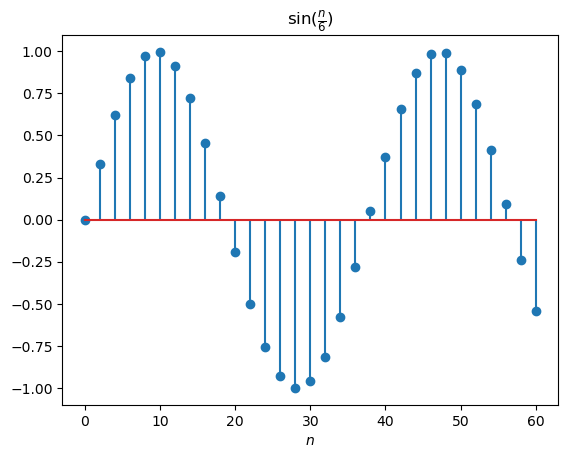

In [6]:
# 1
n = np.linspace(0, 60, 31) # create an NumPy array, [0, 2, 4, ..., 58, 60]
# or
n = np.arange(0, 61, 2) 
# or
n = np.arange(61)[::2] # create an NumPy array, [0, 1, 2, ..., 59, 60], and then take every other element

# 2
y = np.sin(n / 6)

# 3
plt.stem(n, y, use_line_collection=True)
plt.title(r"$\sin(\frac{n}{6})$")
plt.xlabel(r"$n$")
plt.show()

This plot shows the discrete-time signal formed by computing the values of the function $\sin(t/6)$ at points that are uniformly spaced at intervals of size $\frac{60-0}{31-1}=2$.

A digital computer cannot store all points of a continuous-time signal since this would require an infinite amount of memory. It is, however, possible to plot a signal which *looks like* a continuous-time signal, by computing the value of the signal at closely spaced points in time, and then connecting the plotted points with lines. The `plt.plot` function may be used to generate such plots.

<h3 style="color:red;"><left>Exercise 5.2</left></h3>

**_1. Use the following instructions to generate two continuous-time plots of the signal: $\sin(t/6)$._**

1. Initialize ```n1```, a NumPy array starting from 0 and ending at 60, with a step size of 2 (i.e., 31 elements).
2. Initialize ```z=sin(n1 / 6)```, using the function ```np.sin(x)```.
3. Create the plot, using the function ```plt.plot(x, y)```.

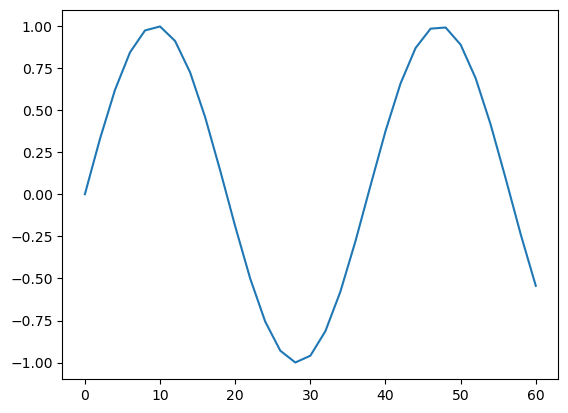

In [5]:
n1 = np.linspace(0, 60, 31)

z = np.sin(n1 / 6)

plt.plot(n1,z)

1. Initialize ```n2```, a NumPy array starting from 0 and ending at 60, with a step size of 10 (i.e., 7 elements).
2. Initialize ```w=sin(n2 / 6)```, using the function ```np.sin(x)```$.
3. Create the plot, using the function ```plt.plot(x, y)```.

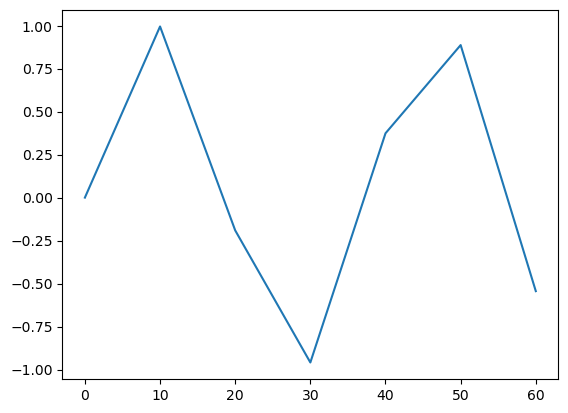

In [6]:
n2 = np.linspace(0, 60, 7)

w = np.sin(n2 / 6) 

plt.plot(n2, w)

**_2. Comment on the accuracy of each of the continuous time plots._**

The graph with more sample describe the output better. Thus, the first one with 30 sample show a better picture of sin shape than the second one with 6 sample.

<h3 style="color:salmon;"><left>5.3. Vector Index versus Time</left></h3>

We saw in [Section 4.1](#4.1.-Displaying-Continuous-Time-and-Discrete-Time-Signals-in-Python-3) that the samples of a continuous-time signal, say $x(t)$, can be stored in a NumPy array. It is common practice to use the same variable for the vector and the signal. So one often denotes the samples of $x(t)$ by $x[n]$, even though this is an abuse of notation and lacks rigor.

It is important not to confuse the index of a vector $x[n]$ with the value of the independent variable of a function $x(t)$. For example, Python 3 can be used to represent the function $x(t)=\sin(t)$ by sampling $t$ at small intervals. The resulting samples may be stored in a NumPy array called `x` in your program. However, it is important to realize that the function $x$ and the NumPy array `x` in the program are not the same things. The following code illustrates this.

In [23]:
t1 = np.linspace(-10, 10, 201)
x = np.sin(t1)

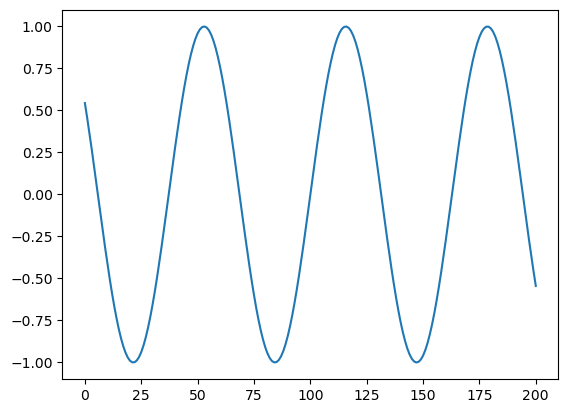

In [8]:
plt.plot(x)
plt.show()

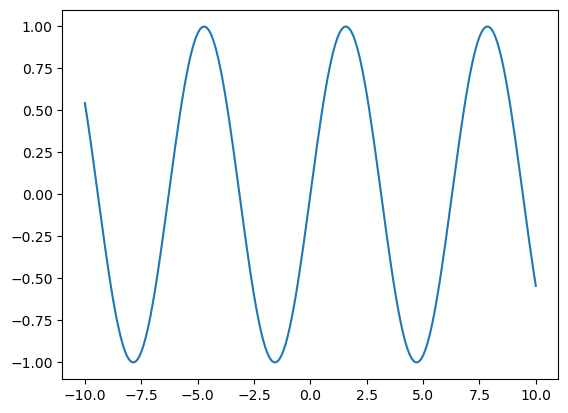

In [9]:
plt.plot(t1, x)
plt.show()

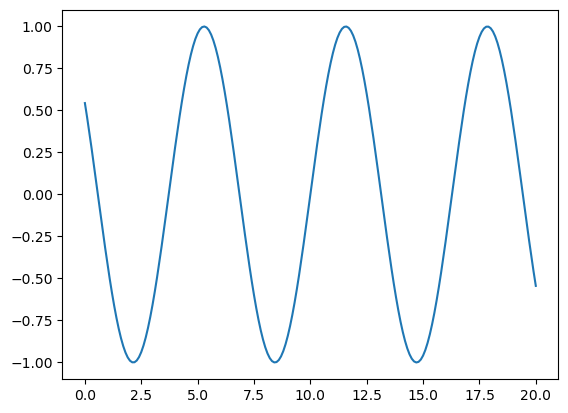

In [10]:
t2 = np.linspace(0, 20, 201)
plt.plot(t2, x)
plt.show()

<h3 style="color:red;"><left>Exercise 5.4</left></h3>

**1. Run the code above and explain the difference between the three signals represented.** 

**Hint:** Click on the cell and change it from being a ```Markdown``` type to ```Code``` type.

The first plot simply represent how the sinwave will behave. Second plot show the sin wave in the given frame t1. Third plot seems like switch the input from t1 to t2 inside the sin function.

**2. Write Python 3 code that would print the graph of $\sin(t)$ for the values of $t$ on the interval [3.5, 4.5]. (Pick a suitable increment for $t$.)**

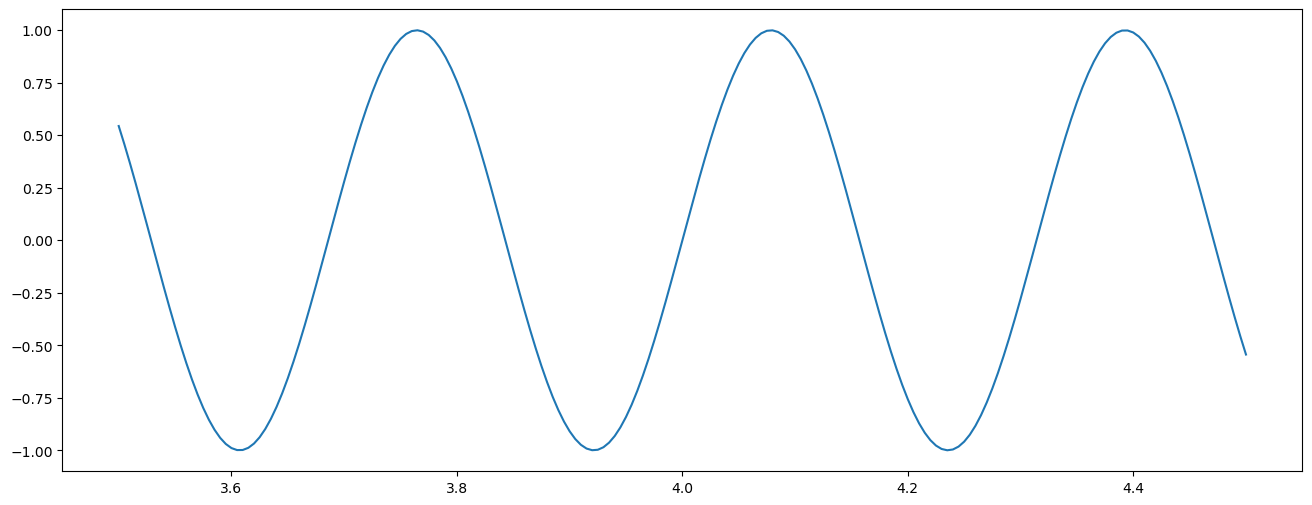

In [24]:
t = np.linspace(3.5, 4.5, 201)

plt.plot(t, x)

plt.show()

<h3 style="color:red;"><left>Exercise 5.5</left></h3>

**1. Compute these two integrals on a blank sheet of paper. Do the computations manually.**

1. $\begin{align}\int_0^{2\pi}\sin^2(7t)dt\end{align}$
2. $\begin{align}\int_0^1e^tdt\end{align}$

1. $\pi$
2. $e^1 - 1$

<h3 style="color:salmon;"><left>5.6. Numerical Computation of Continuous-Time Signals</left></h3>

One common calculation on continuous-time signals is integration. Figure 1 illustrates a method used for computing the widely used Riemann integral. The Riemann integral approximates the area under a curve by breaking the region into many rectangles and summing their areas. Each rectangle is chosen to have the same width $\Delta t$, and the height of each rectangle is the value of the function at the start of the rectangle's interval.

<figure>
    <img src="imgs/lab01_figure1.png" style="width:50%" alt="Figure 1">
    <em><center>Figure 1: Illustration of the Riemann integral</center></em>
</figure>

<h3 style="color:red;"><left>Exercise 5.7</left></h3>

**1. To see the effects of using a different number points to represent a continuous-time signal, write a Python function for numerically computing the integral of the function $\sin^2(7t)$ over the interval $[0,2\pi]$. The syntax of the function is**
```python
def integ1(N):
    """
    Parameters
    ---
    N: the number of rectangles
    
    Returns
    ---
    I: the approximate integral
    """
    return I
```
**where `I` is the result to be returned and `N` is the number of rectangles used to approximate the integral. This function should use the `np.sum` function and it should NOT contain any *for* loops!**

**Note:** Since Python is an *interpreted* language, *for* loops are relatively slow. Therefore, we will avoid using loops whenever possible.</font>

In [3]:
import math


In [11]:
def integ1(N):
    x = np.linspace(0, 2 * math.pi, N + 1)
    y = get_square(np.sin(7*x))
    return y;


**2. Write a script in a different block that evaluates $I(N)$ for $1\leqslant N\leqslant 100$, stores the result in a NumPy array and plots the resulting array as a function of $N$. This script may contain _for_ loops.**

**Note**: This script should call the function
```python
def integ1(N)
```
you just completed.

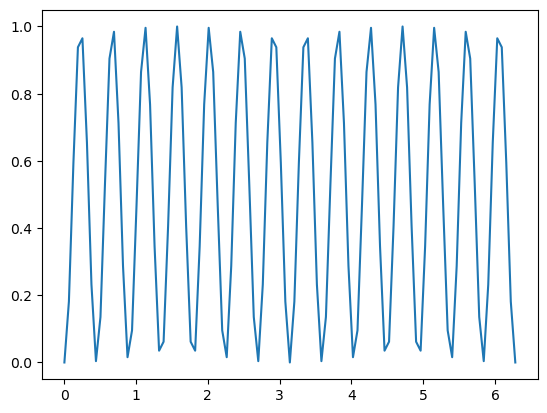

In [12]:
N = 100

z = integ1(N)

x = np.linspace(0, 2 * math.pi, N+1)

plt.plot(x, z)

**3. Write a second function `J = integ2(N)` which numerically computes the integral of $e^t$ on the interval [0, 1].** The syntax of the function is

```python
def integ2(N):
    """
    Parameters
    ---
    N: the number of rectangles
    
    Returns
    ---
    J: the approximate integral
    """
    return J
```

In [16]:
def integ2(N):
    x = np.linspace(0, 1, N + 1)
    y = np.exp(x)
    return y;



**4. Write a script in the next block that evaluates $J(N)$ for $1\leqslant N\leqslant 100$, stores the result in a NumPy array and plots the resulting array as a function of $N$. This script may contain _for_ loops.**

**Note**: This script should call the function
```python
def integ2(N)
```
you just completed.

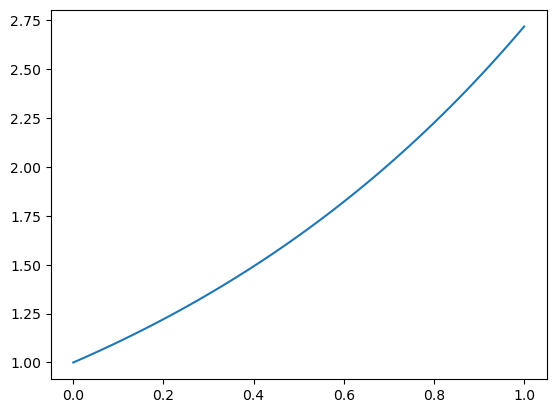

In [17]:
N = 100

z = integ2(N)

x = np.linspace(0, 1, N+1)

plt.plot(x, z)


**5. Compare your results to the analytical solutions from Section 4.3. Explain why $I(7)=I(14)=0$.**

Because it's the next cycle

<h2 style="color:salmon;"><left>6. Processing of Speech Signals</left></h2>

Digital signal processing is widely used in speech processing for applications ranging from speech compression and transmission, to speech recognition and speaker identification. This exercise will introduce the process of reading and manipulating a speech signal.

<h3 style="color:red;"><left>Exercise 6.1</left></h3>

**1. Import `soundfile` module, and use `sf` as the alias.**

In [1]:
import soundfile as sf


**2. Do the following:**

1. Use the function [```speech, fs = sf.read("speech.au")```](https://pysoundfile.readthedocs.io/en/latest/#read-write-functions) to load file _speech.au_ into Python. Note that this function returns two arguments, where the first one is the data, and the second one is the sampling rate.
2. Play the signal, using the command ```ipd.Audio(speech, rate=fs)```.
3. Plot the signal on the screen as if it were a continuous-time signal (i.e., use the `plt.plot` command).

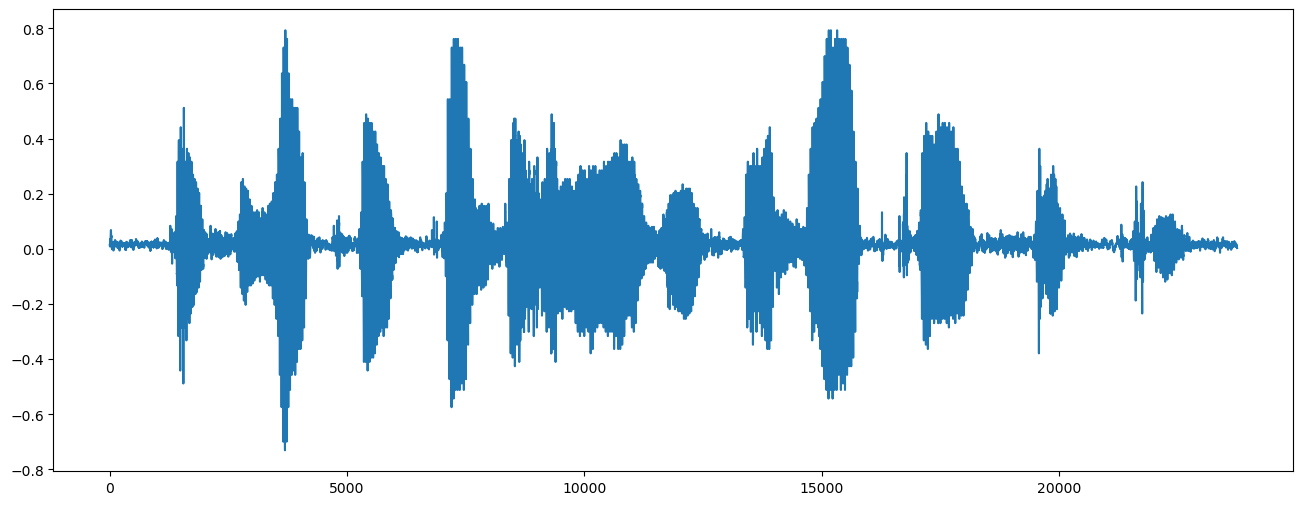

In [36]:
speech, fs = sf.read("speech.au")
ipd. Audio(speech, rate=fs)
plt.plot(speech)

<h2 style="color:salmon;"><left>7. Special Functions</left></h2>

<h3 style="color:red;"><left>Exercise 7.1</left></h3>

**Plot the following two continuous-time functions over the specified intervals.**

1\. $\begin{align}\begin{cases}\frac{\sin(\pi t)}{\pi t}&t\neq0\\1&t=0\end{cases}\quad\text{for }t\in[-10\pi,10\pi]\end{align}$

2\. $\begin{align}\text{rect}(t)\quad\text{for }t\in[-2,2]\end{align}$

**Hint**: The function $\mathtt{rect}()$ may be computed in Python by using a Boolean expression. For example, if
```python
t = np.linspace(-10, 10, 201)
```
then $y=\text{rect}(t)$ may be computed using the command
```python
y = (abs(t) <= 0.5).astype(float)
```

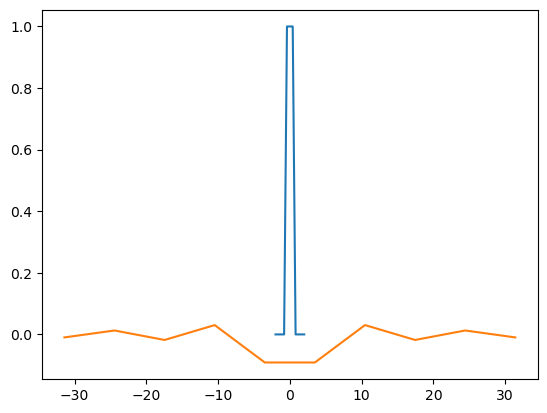

In [6]:
t = np.linspace(-2, 2, 11)
y = (abs(t) <= 0.5).astype(float)

t1 = np.linspace(-10*math.pi, 10*math.pi, 10)
z = np.sin(math.pi*t1)/(math.pi*t1)

plt.plot(t, y)
plt.plot(t1, z)

<h3 style="color:red;"><left>Exercise 7.2</left></h3>

**1. For each of the following functions, write a Python function that takes two arguments, `a` and `n`. Then write the script below to stem those 2 discrete-time functions for $a=0.8$, $a=1.0$ and $a=1.5$, by calling the Python functions you just wrote.**

1\. $\begin{align}a^n(u[n]-u[n-10])\quad\text{for }n\in[-20,20]\end{align}$

2\. $\begin{align}\cos(\omega n)a^nu[n]\quad\text{for }\omega=\pi/4,\text{ and }n\in[-1,10]\end{align}$

The syntax of the functions should be:

```python
    def func_7_2_1(a, n):
        pass
```

and 

```python
    def func_7_2_2(a, n):
        pass
```

**Hint**: The unit step function $y=u[n]$ may be computed in Python 3 using the command
```python
y = (n >= 0).astype(float)
```
where $\mathtt{n}$ is a vector of values of time indices.

<StemContainer object of 3 artists>

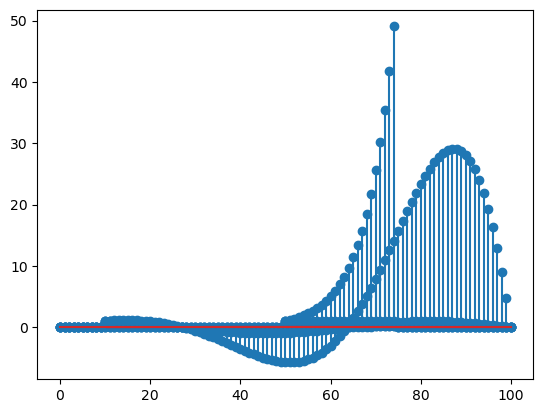

In [22]:
def func_7_2_1(a, n):
    return a**n*((n >= 0).astype(float)-(n >= 10).astype(float))

def func_7_2_2(a, n):
    return np.cos(math.pi/4*n)*a**n*(n >= 0).astype(float)

n = np.linspace(-20, 20, 101)
plt.stem(func_7_2_1(0.8, n))
plt.stem(func_7_2_1(1, n))
plt.stem(func_7_2_1(1.5, n))

n = np.linspace(-1, 10, 101)
plt.stem(func_7_2_2(0.8, n))
plt.stem(func_7_2_2(1, n))
plt.stem(func_7_2_2(1.5, n))

<h2 style="color:salmon;"><left>8. Sampling</left></h2>

The word _sampling_ refers to the conversion of a continuous-time signal into a discrete-time signal. The signal is converted by taking its value, or sample, at uniformly spaced points in time. The time between two consecutive samples is called the _sampling period_. For example, a sampling period of $0.1$ seconds implies that the value of the signal is stored every $0.1$ seconds.

<h3 style="color:red;"><left>Exercise 8.1</left></h3>

Consider the signal $f(t)=\sin(2\pi t)$. We may form a discrete-time signal, $x[n]$, by sampling this signal with a period of $T_s$. In this case,

$\begin{align}x(n)=f(T_sn)=\sin(2\pi T_sn)\end{align}$

**1. Firstly,using the previously presented signal, complete the following function**

```python
def func_8(Ts, n):
    pass
```

In [24]:
def func_8(Ts, n):
    return np.sin(2*math.pi*Ts*n)

**2. Use the ```plt.stem``` to plot the function $f(T_sn)$ defined above for the following values of $T_s$ and $n$.** 

**Note:** Your code should call the function defined above.

1\. $\begin{align}T_s=1/10,0\leqslant n\leqslant 100;\quad\text{axis}([0, 100, -1, 1])\end{align}$

2\. $\begin{align}T_s=1/3,0\leqslant n\leqslant 30;\quad\text{axis}([0, 30, -1, 1])\end{align}$

3\. $\begin{align}T_s=1/2,0\leqslant n\leqslant 20;\quad\text{axis}([0, 20, -1, 1])\end{align}$

4\. $\begin{align}T_s=10/9,0\leqslant n\leqslant 9;\quad\text{axis}([0, 9, -1, 1])\end{align}$

<StemContainer object of 3 artists>

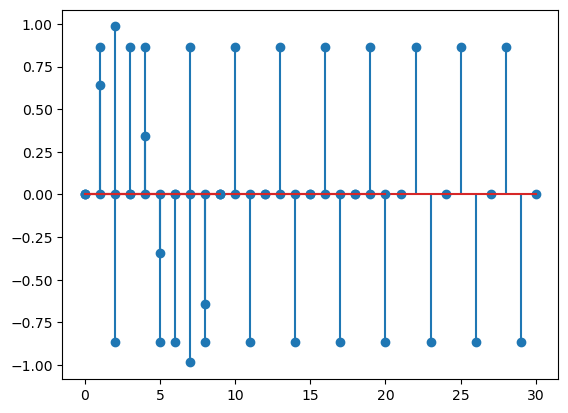

In [29]:
n = np.linspace(0, 30, 31)
plt.stem(func_8(1/3, n))

n = np.linspace(0, 20, 21)
plt.stem(func_8(1/2, n))

n = np.linspace(0, 9, 10)
plt.stem(func_8(10/9, n))


<StemContainer object of 3 artists>

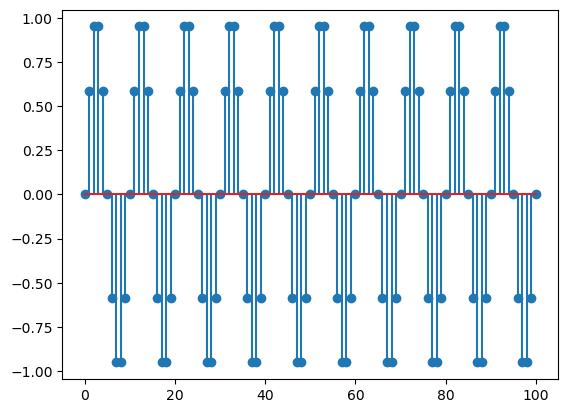

In [28]:
n = np.linspace(0, 100, 101)
plt.stem(func_8(1/10, n))

**3. Discuss your results obtained from the 4 plots above. How does the sampled version of the signal with $T_s=1/10$ compare to those with $T_s=1/3$, $T_s=1/2$ and $T_2=10/9$?**

It has more information

<h2 style="color:salmon;"><left>9. 2-D Signals</left></h2>

So far we have only considered 1-D signals such as speech signals. However, 2-D signals are also very important in digital signal processing. For example, the elevation at each point on a map, or the color at each point on a photograph are examples of important 2-D signals. As in the 1-D case, we may distinguish between continuous-space and discrete-space signals. However in this section, we will restrict attention to discrete-space 2-D signals.

<h3 style="color:red;"><left>Exercise 9.1</left></h3>

When working with 2-D signals, we may choose to visualize them as images or as 2-D surfaces in a 3-D space. To demonstrate the differences between these two approaches, we will use two different display techniques in Python. Do the following:

**1. Use the ```np.meshgrid``` command to generate the discrete-space 2-D signal $\begin{align}f[m,n]=255|\text{sinc}(0.2m)\text{sinc}(0.2n)|\end{align}$ for $-20\leqslant m \leqslant 20$ and $-20 \leqslant n\leqslant 20$.**

In [35]:
m = np.linspace(-20, 20, 101)
n = np.linspace(-20, 20, 101)

x, y = np.meshgrid(m, n)
z = 255*abs(np.sinc(0.2*x)*np.sinc(0.2*y))

**2. Use the following code to display the signal as a surface plot.**

C:\Users\rxw14\AppData\Local\Temp\ipykernel_19620\1054440841.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


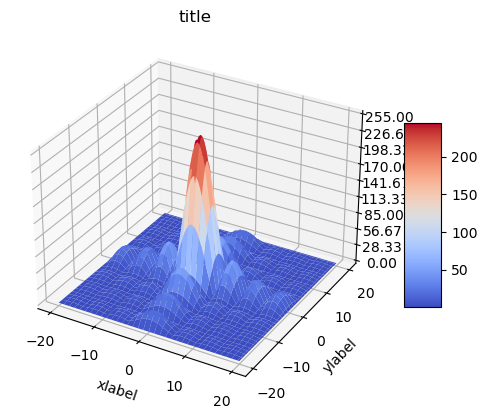

In [38]:
# refer to https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def mesh_plot(X, Y, Z, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=2, antialiased=True)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

mesh_plot(x, y, z, "title", "xlabel", "ylabel")

**3. Display the signal as an image. Use the function attribute ```cmap='gray'``` inside the ```plt.imshow()``` command to obtain a grayscale image.**

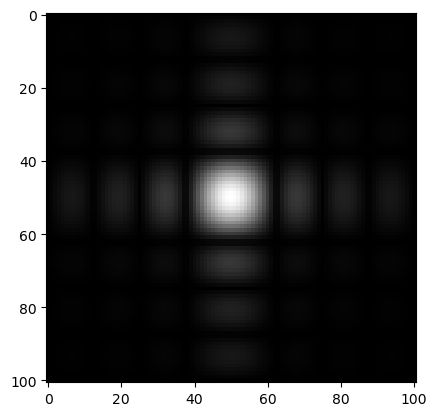

In [39]:
plt.imshow(z, cmap='gray')

**4. For which applications do you think the surface plot works better? When would you prefer the image?**

light. Image is prefered if I need better visualization

<h2 style="color:salmon;"><left>10. 2D Random Signals - Optional Exercise</left></h2>

The objective of this section is to show how to recover a signal from noisy observations of that signal.

**1. Generate one $100\times100$ image with a $10\times10$ white square in the middle (pixel value $110$) on a black background (pixel value $100$). Add a random number to each pixel value of the image. The random number for each pixel should be generated independently following a uniform distribution on the interval $[-100,100]$. Use the Python command ```np.random.rand()``` to generate these random numbers.**

**Hint**: While command ```np.random.rand()``` generates a sample of a uniform random variable on the interval $[0,1]$, the command ```np.random.rand() - 3``` will generate a sample from uniform random variable on the interval $[-3,-2]$, and the command ```7 * np.random.rand()``` will generate a sample from uniform random variable on the interval $[0,7]$.

In [39]:
# insert your code here


**2. Having added a random number to each pixel of the square image, you have created a "noisy observation" of the square image. Display the resulting 2D signal (the noisy observation) as an image using the command `plt.imshow()` (e.g., `plt.imshow(X,[])`.)**

In [40]:
# insert your code here


**3. Can you distinguish the square in the center of the noisy image?**

insert your answer here

**4. Repeat this procedure to generate 99 additional (different) noisy observations of the image of the square. Obtain a new image by averaging the pixel values of each of these $100$ images. Plot the resulting new image.**

**Hint**: Create a 3-d NumPy array by ```image_arr = np.zeros((N, H, W))```, where $N=100$ is the number of images, $H=100$ is the height of the image and $W=100$ is the width of the image. You may assign values to this 3-d array by using a *for* loop, then use the function ```np.mean(images, axis=0)``` to take the average of the pixel values of each of these $100$ images.

In [41]:
# insert your code here


**5. Can you distinguish the square in the center of the new image?**

insert your answer here